# **SPOTIFY SONGS DATASET EXPLORATORY DATA ANALYSIS PROJECT**

- [X] Top 5 most popular artists
- [X] Top 5 loudest tracks
- [X] Artist with the most dance-feel song
- [X] Top 10 intsrumental based tracks
- [X] Multiple feature plots
- tempo
- loudness
- acousticness
- danceability
- duration_ms
- energy
- instrumentalness
- liveness
- speechiness
- valence
- [X] Top 10 energetic tracks
- [X] Top 10 tracks with the most valence
- [X] Most common duration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style("darkgrid")

**Load Dataset**

In [ ]:
df=pd.read_csv("./datasets/spotify_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


##Data cleaning

In [ ]:
df.isna().sum()
##through this we find that data is clean

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
df.info() #shows different datatypes of the specifc columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   int64  
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(9), int64(5), object(2)
memory 

In [ ]:
df.shape ##data was collected in 2017,with 16 columns

(2017, 16)

In [ ]:
len(df.columns)

16

In [ ]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

**Analysis**

In [ ]:
df.describe() #used Spotify documentation to understand meaning of all these elements

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Top 5 most popular artists

In [ ]:
top_five_artists=df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

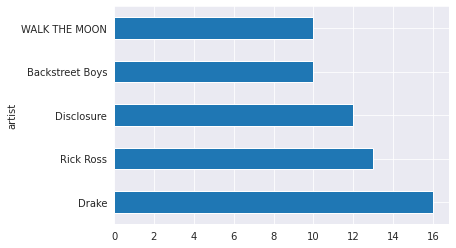

In [ ]:
top_five_artists.plot.barh()
plt.show()

###Top 5 loudest tracks

In [ ]:
top_five_loudest_tracks=df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5] #more negative the number,louder is the music
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


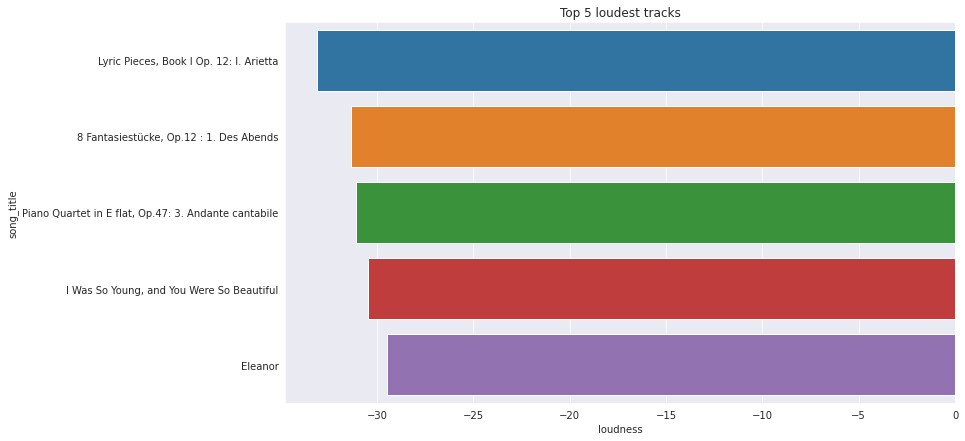

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

###Artists with the most danceable song

In [ ]:
top_five_artists_dance_songs=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_five_artists_dance_songs #1 is highest and 0 is lowest

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


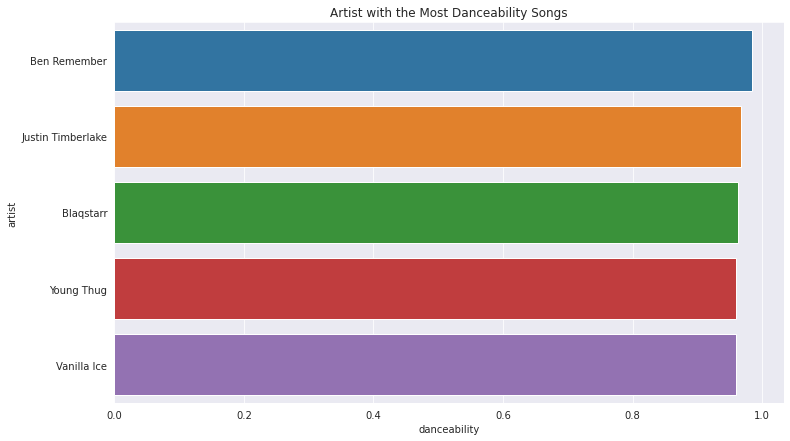

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability",y="artist",data=top_five_artists_dance_songs)
plt.title("Artist with the Most Danceability Songs")
plt.show()

### Top 10 Instrumental Tracks

In [ ]:
top_ten_instrumental_tracks=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:10]
top_ten_instrumental_tracks #predicts track if it is vocals or more instrumental based, higher instrumentalness->lesser vocals
#if above 0.5,more instrumental

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


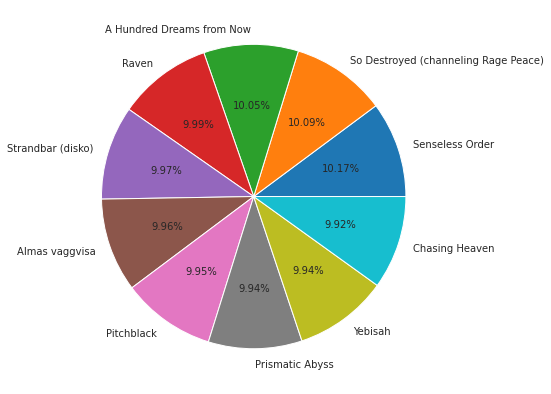

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness",data=top_ten_instrumental_tracks,autopct='%1.2f%%',labels=top_ten_instrumental_tracks.song_title)
plt.show()

###Multiple feature plots

In [ ]:
interest_feature_cols=["tempo","loudness","acousticness","danceability","duration_ms","energy","instrumentalness","liveness","speechiness","valence"]

<ipython-input-24-ee59359f1d3a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30,label="Positive",color="green")
<ipython-input-24-ee59359f1d3a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")
<ipython-input-24-ee59359f1d3a>:7:

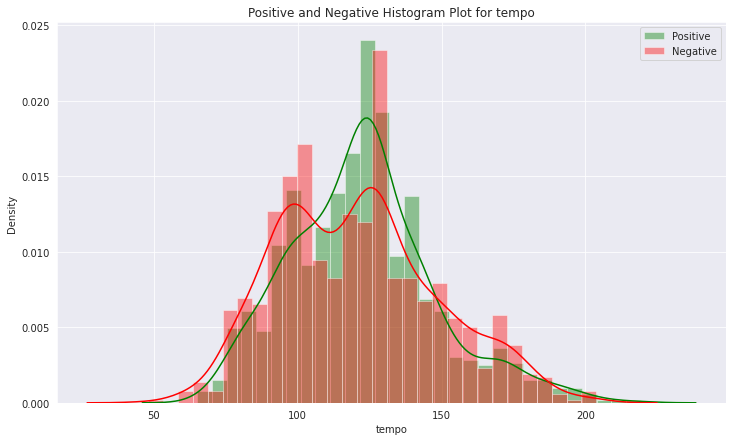

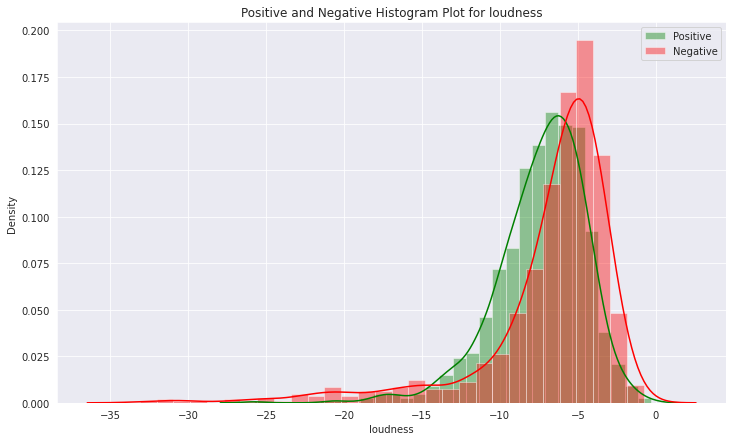

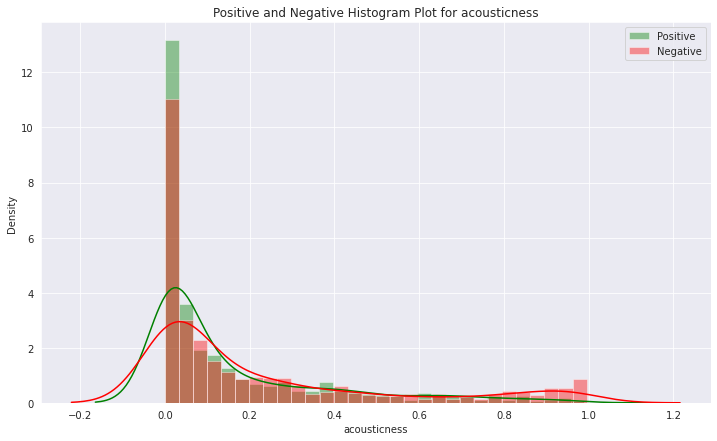

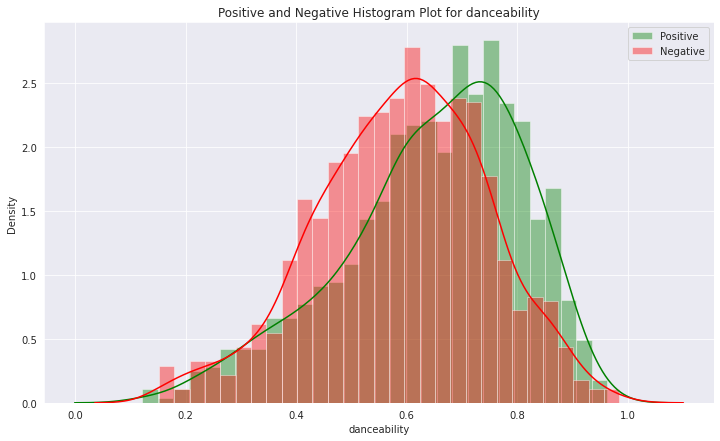

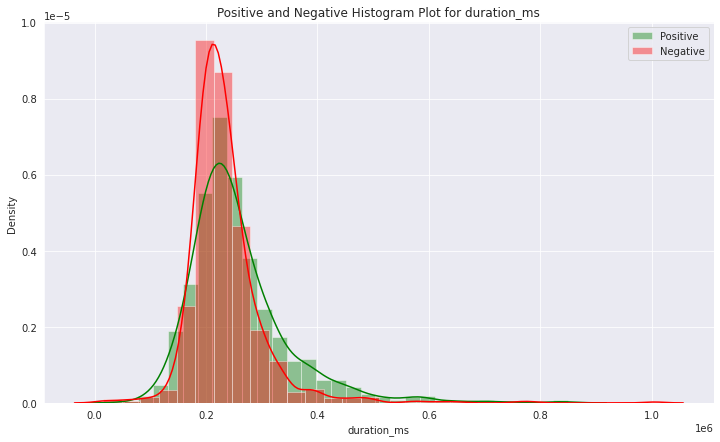

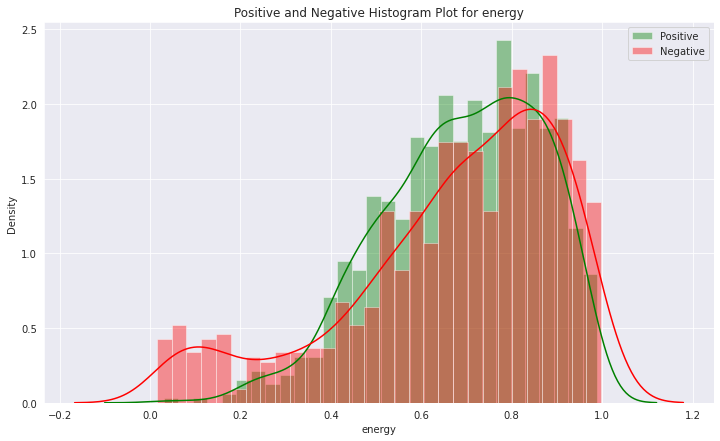

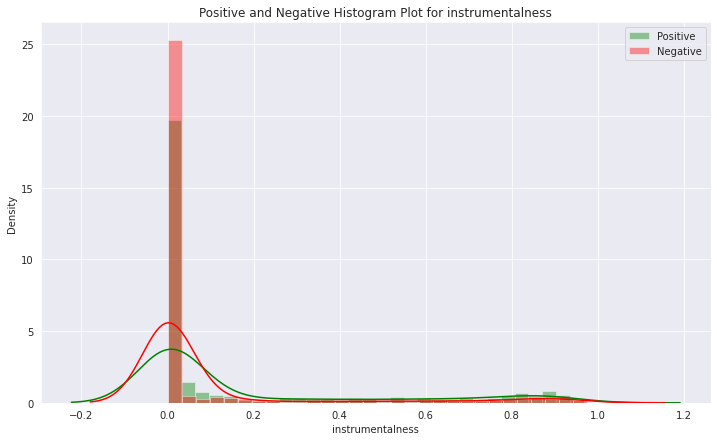

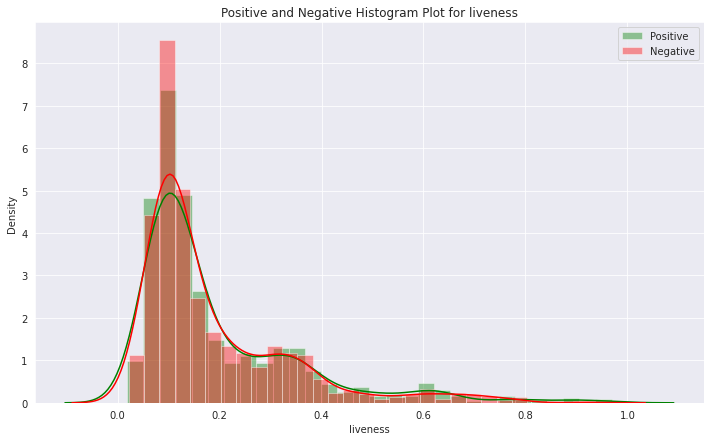

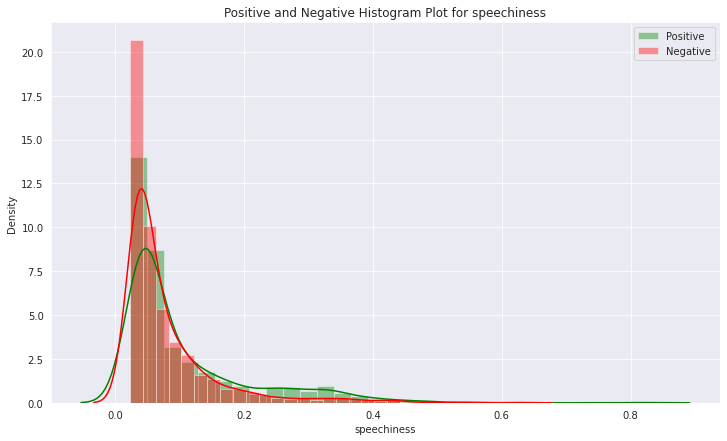

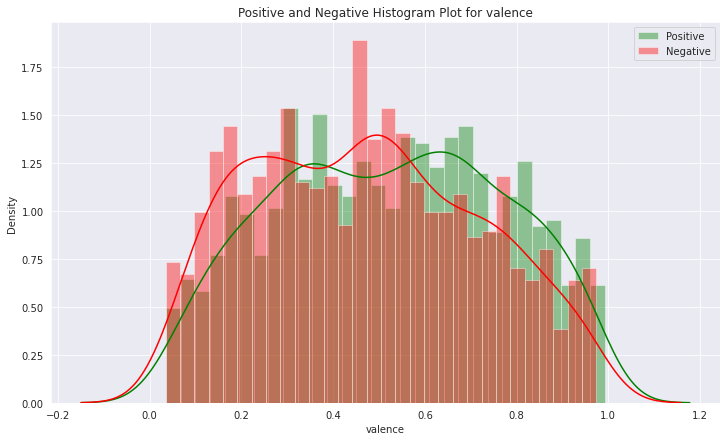

In [ ]:
for feature_col in interest_feature_cols:
    pos_data=df[df["target"]==1][feature_col]
    neg_data=df[df["target"]==0][feature_col]
    
    plt.figure(figsize=(12,7))

    sns.distplot(pos_data, bins=30,label="Positive",color="green")
    sns.distplot(neg_data, bins=30, label="Negative", color="red")
    plt.legend(loc="upper right")
    plt.title(f"Positive and Negative Histogram Plot for {feature_col}")

In [ ]:
#valence-positivity shown by a track
#tempo-beats per minute-results:people like arounf tempo of around 120-140
#loudness-results-around-7 to -3, people like
#danceability-majority around 0.7
#energy-results:majority 0.4 to 0.(more intense and more active)
#speechiness-


##TOP 10 MOST ENERGETIC TRACKS

In [ ]:
top_ten_energetic_tracks=df[["energy","song_title","artist"]].sort_values(by="energy",ascending=False)[:10]
top_ten_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


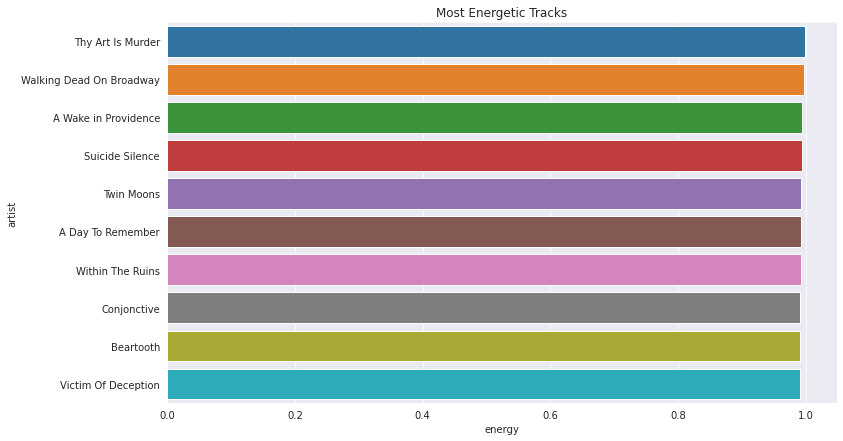

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="energy",y="artist",data=top_ten_energetic_tracks)
plt.title("Most Energetic Tracks")
plt.show()

## Top 10 tracks with most valence

In [ ]:
top_ten_valence_tracks=df[["valence","song_title","artist"]].sort_values(by="valence",ascending=False)[:10]
top_ten_valence_tracks

,valence,song_title,artist
460,0.992,Abataka - Original Mix,Ida Engberg
912,0.975,I'm Walkin' - 2002 Digital Remaster,Fats Domino
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",Polina
207,0.973,Look at You,George McCrae
48,0.973,Azon de ma gnin kpevi,T. P. Orchestre Poly-Rythmo
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
1590,0.972,Jelly On A Plate,The Kids Band
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
497,0.968,Mi Swing es Tropical,Nickodemus
112,0.967,Please Mr. Postman,The Marvelettes


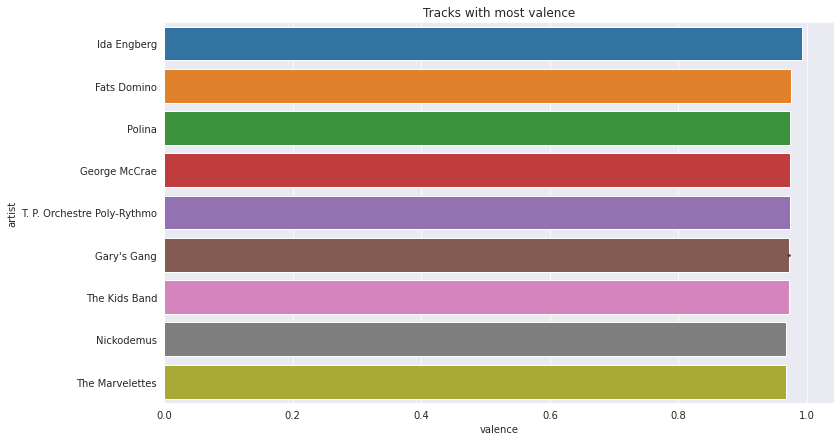

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="valence",y="artist",data=top_ten_valence_tracks)
plt.title("Tracks with most valence")
plt.show()

##Most Common duration

<ipython-input-34-be8f71464f2f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30,label="Positive",color="green")
<ipython-input-34-be8f71464f2f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=30, label="Negative", color="red")


Text(0.5, 1.0, 'Positive and Negative Histogram Plot for duration_ms')

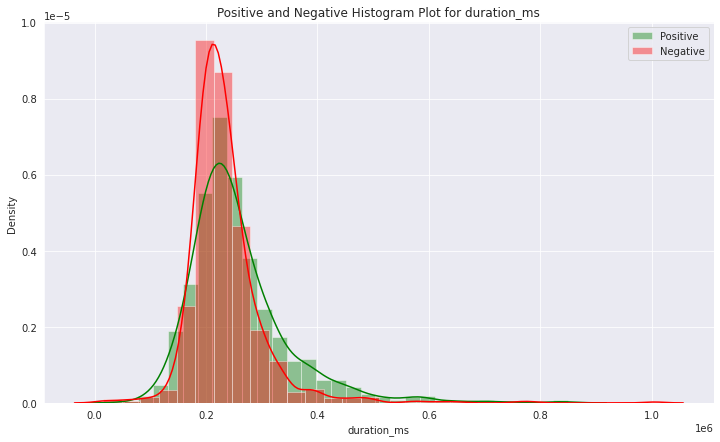

In [ ]:
pos_data=df[df["target"]==1]["duration_ms"]
neg_data=df[df["target"]==0]["duration_ms"]
    
plt.figure(figsize=(12,7))

sns.distplot(pos_data, bins=30,label="Positive",color="green")
sns.distplot(neg_data, bins=30, label="Negative", color="red")
plt.legend(loc="upper right")
plt.title(f"Positive and Negative Histogram Plot for duration_ms")